In [35]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [36]:
image = cv2.imread('input/watermelon.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)   # its not BGR2HSV_full so is 180 degree not 360

In [37]:
H, S, V = cv2.split(image)

In [38]:
# Green: 60 degree   # Blue: 120 degree 
H_new = H.copy().astype(np.float32)

for i in range(H.shape[0]):
    for j in range(H.shape[1]):
        if 30 < H[i,j] <80:  # green
            H_new[i,j] -= 50
        if H_new[i,j] <0:
            H_new[i,j] += 180
        if H[i,j] <15 or H[i,j]> 165:  # red
            H_new[i,j] += 60

H_new = H_new.astype(np.uint8)

In [39]:
result = cv2.merge((H_new, S, V))
result = cv2.cvtColor(result, cv2.COLOR_HSV2RGB)

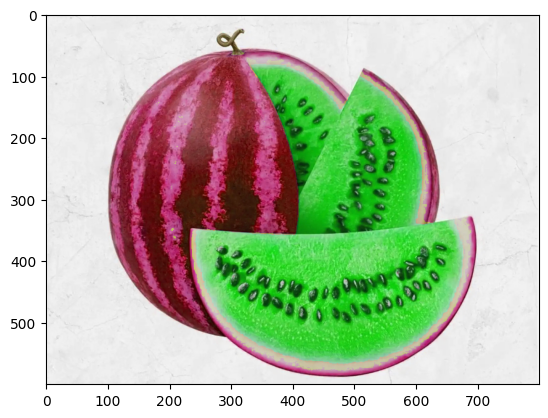

In [40]:
plt.imshow(result)

In [44]:
image = cv2.imread('input/test.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
H, S, V = cv2.split(image)

In [58]:
for i in range(H.shape[0]):
    for j in range(H.shape[1]):
        if S[i,j] > 100:    # not affect on face color
            if H[i,j] <15:
                H[i,j] += 120
            elif H[i,j] > 165:
                H[i,j] -= 60

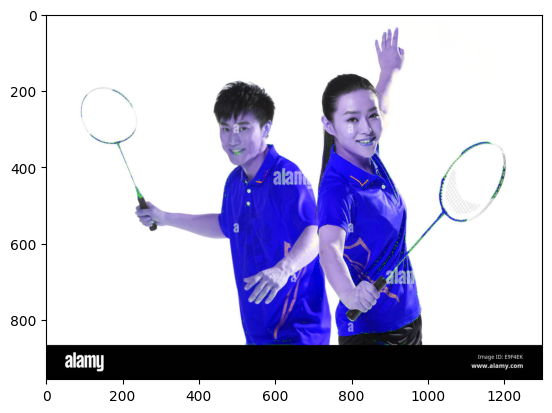

In [59]:
result = cv2.merge((H, S, V))
result = cv2.cvtColor(result, cv2.COLOR_HSV2RGB)
plt.imshow(result)
plt.show()